In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#import random
plt.style.use('ggplot')
%matplotlib inline

In [2]:
# I have limited the number of rows to first 1 million rows as the data has over 7 million rows and my computer couldnt handle it.
# I will try the random sample again once I have upgraded my ram
filename = 'C:\\Users\\richter Belmont\\Desktop\\Data Science - Projects\\Grupo Bimbo - Inventory Demand\\train.csv'
#n = sum(1 for line in open(filename)) - 1
#s = 100000
#skip = sorted(random.sample(xrange(1,n+1),n-s))
#bimbo = pd.read_csv(filename, skiprows=skip)
bimbo = pd.read_csv(filename, nrows=1000000)

def get_product_agg(cols):
    bimbo = pd.read_csv(filename, usecols = ['Semana', 'Producto_ID'] + cols, nrows=1000000)
    agg = bimbo.groupby(['Semana', 'Producto_ID'], as_index=False).agg(['count', 'sum', 'min', 'max', 'median', 'mean'])
    agg.columns = ['_'.join(col).strip() for col in agg.columns.values]
    del(bimbo)
    return agg
print("Dataset size: {}".format(bimbo.shape))

Dataset size: (1000000, 11)


In [3]:
bimbo.head()

,Semana,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID,Venta_uni_hoy,Venta_hoy,Dev_uni_proxima,Dev_proxima,Demanda_uni_equil
0,3,1110,7,3301,15766,1212,3,25.14,0,0.0,3
1,3,1110,7,3301,15766,1216,4,33.52,0,0.0,4
2,3,1110,7,3301,15766,1238,4,39.32,0,0.0,4
3,3,1110,7,3301,15766,1240,4,33.52,0,0.0,4
4,3,1110,7,3301,15766,1242,3,22.92,0,0.0,3


In [4]:
bimbo.tail()

,Semana,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID,Venta_uni_hoy,Venta_hoy,Dev_uni_proxima,Dev_proxima,Demanda_uni_equil
999995,3,1130,1,1217,4131074,1232,1,18.24,0,0.0,1
999996,3,1130,1,1217,4131074,1284,5,15.10,0,0.0,5
999997,3,1130,1,1217,4131074,2665,2,32.00,0,0.0,2
999998,3,1130,1,1217,4131120,1242,3,22.92,0,0.0,3
999999,3,1130,1,1217,4131120,1278,6,27.00,0,0.0,6


In [4]:
#What columns do we have?
print("{} columns: {}".format(len(bimbo.columns), bimbo.columns))

11 columns: Index([u'Semana', u'Agencia_ID', u'Canal_ID', u'Ruta_SAK', u'Cliente_ID',
       u'Producto_ID', u'Venta_uni_hoy', u'Venta_hoy', u'Dev_uni_proxima',
       u'Dev_proxima', u'Demanda_uni_equil'],
      dtype='object')


In [5]:
cols = ['Venta_hoy', 'Venta_uni_hoy', 'Dev_proxima', 'Dev_uni_proxima']
print (cols)
for col in cols:
        print(bimbo[col].describe())

['Venta_hoy', 'Venta_uni_hoy', 'Dev_proxima', 'Dev_uni_proxima']
count    1000000.000000
mean          70.972177
std          287.996647
min            0.000000
25%           18.980000
50%           34.590000
75%           63.360000
max        31809.600000
Name: Venta_hoy, dtype: float64
count    1000000.000000
mean           6.646702
std           17.139278
min            0.000000
25%            2.000000
50%            4.000000
75%            7.000000
max         2000.000000
Name: Venta_uni_hoy, dtype: float64
count    1000000.000000
mean           1.084095
std           20.277760
min            0.000000
25%            0.000000
50%            0.000000
75%            0.000000
max         9426.000000
Name: Dev_proxima, dtype: float64
count    1000000.000000
mean           0.089440
std            1.770789
min            0.000000
25%            0.000000
50%            0.000000
75%            0.000000
max         1008.000000
Name: Dev_uni_proxima, dtype: float64


In [6]:
bimbo.corr()

,Semana,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID,Venta_uni_hoy,Venta_hoy,Dev_uni_proxima,Dev_proxima,Demanda_uni_equil
Semana,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Agencia_ID,NaN,1.000000,-0.166339,-0.150672,0.089033,-0.085421,-0.004869,0.014163,-0.015409,-0.018894,-0.003825
Canal_ID,NaN,-0.166339,1.000000,0.137719,0.037526,0.047104,0.136533,0.128543,0.041257,0.045414,0.135571
Ruta_SAK,NaN,-0.150672,0.137719,1.000000,-0.002603,0.466233,-0.079498,-0.128043,-0.021973,-0.039989,-0.077642
Cliente_ID,NaN,0.089033,0.037526,-0.002603,1.000000,-0.016911,-0.045715,-0.038818,-0.004340,-0.005347,-0.045585
Producto_ID,NaN,-0.085421,0.047104,0.466233,-0.016911,1.000000,0.105543,0.066114,0.022649,0.025164,0.104485
Venta_uni_hoy,NaN,-0.004869,0.136533,-0.079498,-0.045715,0.105543,1.000000,0.844166,0.084988,0.125526,0.998411
Venta_hoy,NaN,0.014163,0.128543,-0.128043,-0.038818,0.066114,0.844166,1.000000,0.087227,0.147724,0.841320
Dev_uni_proxima,NaN,-0.015409,0.041257,-0.021973,-0.004340,0.022649,0.084988,0.087227,1.000000,0.731023,0.048996
Dev_proxima,NaN,-0.018894,0.045414,-0.039989,-0.005347,0.025164,0.125526,0.147724,0.731023,1.000000,0.078423


C:\Users\richter Belmont\Anaconda2\lib\site-packages\matplotlib\axes\_base.py:2787: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=3.0, right=3.0
  'left=%s, right=%s') % (left, right))
C:\Users\richter Belmont\Anaconda2\lib\site-packages\matplotlib\axes\_base.py:3045: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=3.0, top=3.0
  'bottom=%s, top=%s') % (bottom, top))


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000A871F60>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000013D6F390>]], dtype=object)

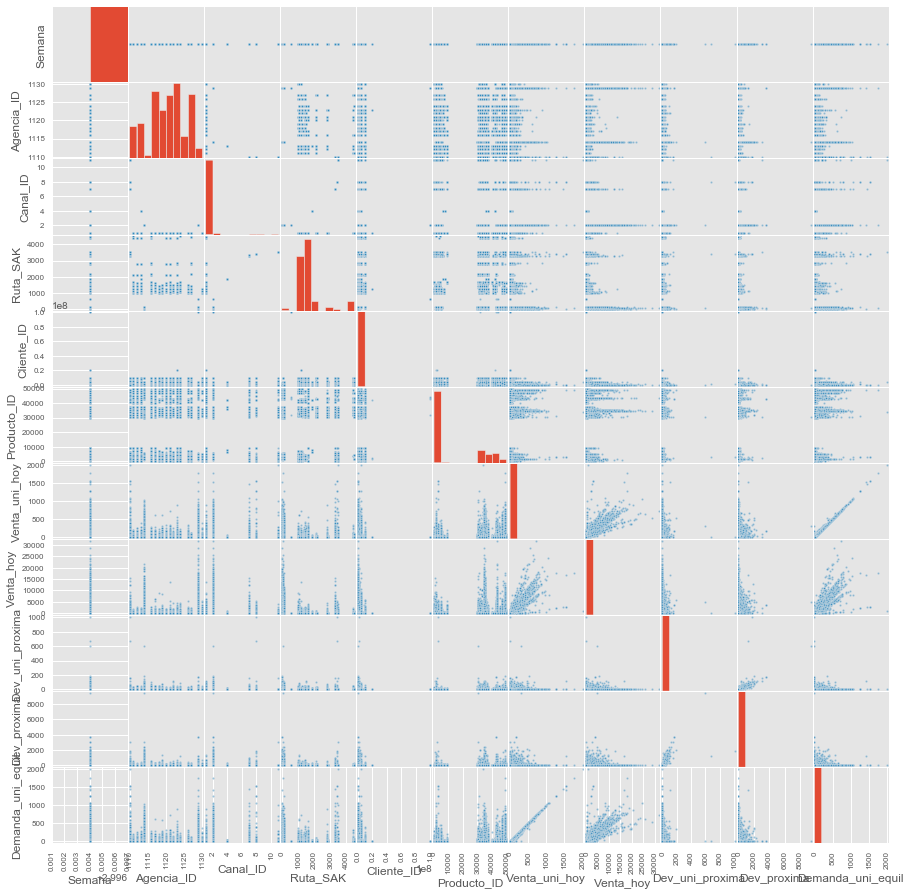

In [7]:
pd.scatter_matrix(bimbo, figsize=(15,15))
# From the below scatter matrix, the only thing that is closely correlated with Demand/target value(Demanda_uni_equil)
# is Sales unit this week(Venta_uni_hoy)

In [8]:
# Bringing in the rest of the information from other file(client name, product name, state)
client = pd.read_csv('C:\\Users\\richter Belmont\\Desktop\\Data Science - Projects\\Grupo Bimbo - Inventory Demand\\cliente_tabla.csv')
town = pd.read_csv('C:\\Users\\richter Belmont\\Desktop\\Data Science - Projects\\Grupo Bimbo - Inventory Demand\\town_state.csv')

Demanda_uni_equil
0        14247
1       160214
2       197875
3       125617
4        99896
5        88443
6        59757
7        28615
8        35778
9        18929
10       42250
11       12002
12       14568
13        8393
14        8319
15       13885
16        6902
17        3772
18        5671
19        2541
20       10045
21        2381
22        2633
23        1738
24        2574
25        3349
26        1504
27        1129
28        1682
29         699
         ...  
784          1
790          1
797          1
800          1
802          1
828          1
842          1
854          1
860          1
875          1
876          1
877          1
882          1
923          1
924          1
958          1
968          1
975          1
990          1
1000         1
1032         1
1048         1
1064         1
1071         1
1260         3
1423         1
1456         1
1540         2
1760         1
2000         1
Name: Demanda_uni_equil, dtype: int64


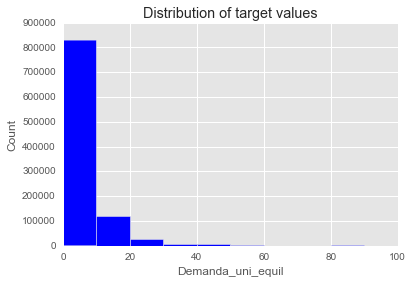

In [9]:
# What is distribution of demand?
demand_distribution = bimbo.groupby('Demanda_uni_equil')
print(demand_distribution['Demanda_uni_equil'].count())

# The demand for a product in a certain week is defined as the sales this week subtracted by the return next week.
target = bimbo['Demanda_uni_equil'].tolist()

def label_plot(title, x, y):
    plt.title(title)
    plt.xlabel(x)
    plt.ylabel(y)

plt.hist(target, color='blue', range=(0,100))
label_plot('Distribution of target values', 'Demanda_uni_equil', 'Count')
# There are plenty of items with demands over 784 units which we cant see in the graph but we can see from the list below.

Venta_uni_hoy
0         4005
1       162351
2       200691
3       126765
4       100646
5        89516
6        60260
7        28668
8        36009
9        18892
10       42771
11       12045
12       14766
13        8374
14        8385
15       14018
16        6942
17        3790
18        5726
19        2509
20       10165
21        2387
22        2643
23        1719
24        2646
25        3372
26        1496
27        1122
28        1711
29         679
         ...  
784          1
790          1
797          1
800          1
802          1
828          1
846          1
854          1
860          1
875          1
876          1
877          1
882          1
924          1
925          1
960          1
968          1
975          1
990          1
1000         1
1032         1
1048         1
1064         1
1071         1
1260         3
1456         1
1533         1
1540         2
1760         1
2000         1
Name: Venta_uni_hoy, dtype: int64


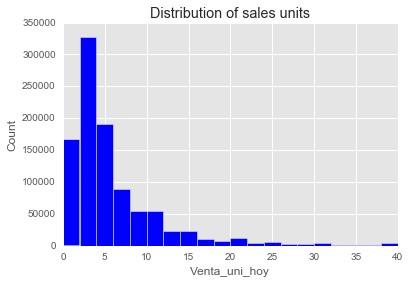

In [11]:
# What is distribution of sales units?
sales_units_dist = bimbo.groupby('Venta_uni_hoy')
print(sales_units_dist['Venta_uni_hoy'].count())

sales_units = bimbo['Venta_uni_hoy'].tolist()
plt.hist(sales_units, bins=20, color='blue', range=(0,40))
label_plot('Distribution of sales units', 'Venta_uni_hoy', 'Count')

Dev_proxima
0.00       971486
0.77            1
2.40            1
3.02          119
3.70           17
3.75           84
3.84            8
3.89            7
4.00            4
4.12            1
4.44           57
4.50          144
4.54           43
4.58           49
4.63            5
4.64            1
4.80            1
4.86           11
4.87            1
4.94            5
4.98            2
5.19           18
5.20            3
5.25            2
5.28           19
5.29            8
5.32            1
5.38           19
5.46            6
5.61            4
            ...  
1371.15         1
1380.86         1
1395.80         1
1398.00         1
1402.20         2
1431.74         1
1435.28         1
1452.00         1
1508.76         1
1521.92         1
1566.99         1
1595.88         1
1608.44         1
1633.50         1
1751.20         1
1785.02         1
1803.20         1
1814.40         1
1870.00         1
1886.04         1
1987.20         1
2012.40         2
2047.76         1
2069.04         

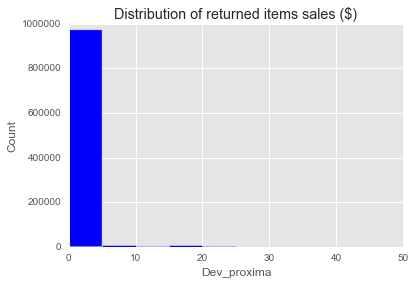

In [13]:
# What is distribution of returned items in $?
returned_sales_dist = bimbo.groupby('Dev_proxima')
print(returned_sales_dist['Dev_proxima'].count())

returned_items_sales = bimbo['Dev_proxima'].tolist()
plt.hist(returned_items_sales, color='blue', range=(0,50))
label_plot('Distribution of returned items sales ($)', 'Dev_proxima', 'Count')
#Interesting, so it looks like there are no returns for the first 1 million rows in week 3.

Dev_uni_proxima
0       971486
1        14353
2         6245
3         2527
4         1388
5         1053
6          620
7          316
8          301
9          191
10         301
11         118
12         151
13          70
14          80
15          93
16          48
17          39
18          58
19          33
20          65
21          25
22          25
23          17
24          37
25          22
26          15
27          18
28          21
29          11
         ...  
71           1
72           3
73           2
75           1
76           2
77           1
79           1
82           1
83           1
84           1
88           1
90           1
91           1
94           1
95           1
96           1
98           2
100          3
110          2
111          1
114          1
120          2
149          1
150          1
152          1
165          2
184          1
600          1
672          1
1008         1
Name: Dev_uni_proxima, dtype: int64


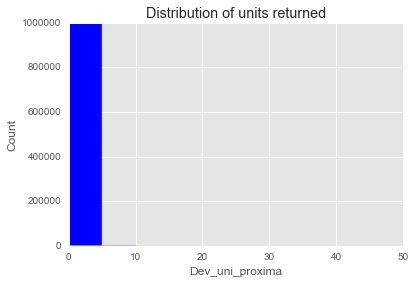

In [14]:
# What is the distribution of units returned?
units_returned_dist = bimbo.groupby('Dev_uni_proxima')
print(units_returned_dist['Dev_uni_proxima'].count())

units_returned = bimbo['Dev_uni_proxima'].tolist()
plt.hist(units_returned, bins=10, color='blue', range=(0,50))
label_plot('Distribution of units returned', 'Dev_uni_proxima', 'Count')
# Looks like we dont have any units returned at all for the first 700,000 rows of data. Does this mean we have fully met the demand? 
# On the other hand, this also means that demand can actually be higher as this doesnt take into account hungry customers who might
# have missed the bread, for example. Currently, daily inventory calculations are performed by direct delivery sales employees
# who must single-handedly predict the forces of supply, demand, and hunger based on their personal experiences with each store. 

Venta_hoy
0.00        4005
0.50           3
0.75           1
0.77           2
1.50           2
1.66           1
2.50           2
3.02         320
3.08           1
3.70         124
3.75          47
3.84           5
3.89           4
4.00           1
4.06          22
4.44         397
4.50         333
4.54         410
4.58         150
4.63           9
4.80           1
4.86          17
4.98           2
5.00           1
5.19         503
5.28         137
5.29           2
5.38         799
5.46         374
5.61           1
            ... 
15851.52       1
16011.73       1
16198.55       1
16212.72       1
16426.28       1
16556.40       1
16670.84       1
16693.04       1
17182.50       1
17359.42       1
17564.40       1
17793.60       1
17841.60       1
17908.80       1
18374.40       1
18583.25       1
19264.00       1
19361.00       1
19558.00       1
19650.70       1
20384.52       1
20941.32       1
21500.16       1
21736.56       1
22813.83       1
23684.31       1
24386.96       1
2567

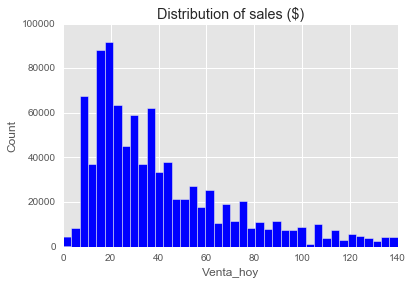

In [15]:
# What is the distribution of sales ($)?
sales_dist = bimbo.groupby('Venta_hoy')
print(sales_dist['Venta_hoy'].count())

sales_dollar = bimbo['Venta_hoy'].tolist()
plt.hist(sales_dollar, bins=40, color='blue', range=(0,140))
label_plot('Distribution of sales ($)', 'Venta_hoy', 'Count')

In [16]:
# Aggregating product to calculate 2 fields at a time
agg1 = get_product_agg(['Demanda_uni_equil','Dev_uni_proxima'])
agg1.head()

Dev_uni_proxima_count  Dev_uni_proxima_sum  \
Semana Producto_ID                                               
3      72                            2935                  397   
       73                            6369                  440   
       108                              6                    0   
       141                            353                   67   
       145                             66                    2   

                    Dev_uni_proxima_min  Dev_uni_proxima_max  \
Semana Producto_ID                                             
3      72                             0                   33   
       73                             0                    4   
       108                            0                    0   
       141                            0                    4   
       145                            0                    1   

                    Dev_uni_proxima_median  Dev_uni_proxima_mean  \
Semana Producto_ID                                                 
3      72                              0.0              0.135264   
       73                              0.0              0.069085   
       108                             0.0              0.000000   
       141                             0.0              0.189802   
       145                             0.0              0.030303   

                    Demanda_uni_equil_count  Demanda_uni_equil_sum  \
Semana Producto_ID                                                   
3      72                              2935                  14707   
       73                              6369                  13081   
       108                                6                    656   
       141                              353                   1860   
       145                               66                    966   

                    Demanda_uni_equil_min  Demanda_uni_equil_max  \
Semana Producto_ID                                                 
3      72                               0                     46   
       73                               0                     39   
       108                             16                    280   
       141                              0                     77   
       145                              0                    115   

                    Demanda_uni_equil_median  Demanda_uni_equil_mean  
Semana Producto_ID                                                    
3      72                                4.0                5.010903  
       73                                2.0                2.053855  
       108                              32.0              109.333333  
       141                               2.0                5.269122  
       145                               3.0               14.636364

In [17]:
# Creating a calculated field for Venta_uni_hoy (count, sum, min, max, median, mean) and join with table above
agg2 = get_product_agg(['Venta_hoy', 'Venta_uni_hoy'])
agg = agg1.join(agg2)
agg

Dev_uni_proxima_count  Dev_uni_proxima_sum  \
Semana Producto_ID                                               
3      72                            2935                  397   
       73                            6369                  440   
       108                              6                    0   
       141                            353                   67   
       145                             66                    2   
       160                             21                   23   
       163                             23                    0   
       183                             49                    5   
       202                            244                    0   
       205                             21                    0   
       214                              5                    0   
       303                           7498                  430   
       323                           5632                  156   
       325                           4195                  143   
       328                           4274                  162   
       357                            663                   90   
       632                             12                  110   
       634                              6                    0   
       635                             16                    0   
       641                            712                   20   
       665                              1                    0   
       693                           3933                  120   
       713                             15                    1   
       714                              2                    0   
       715                             11                    0   
       739                             10                    2   
       779                              1                    0   
       890                              2                    0   
       972                          19582                 1122   
       1039                            97                    3   
...                                   ...                  ...   
       47886                           86                  658   
       48019                           20                    4   
       48029                            1                    0   
       48077                         5838                   61   
       48117                            1                    0   
       48118                            1                    0   
       48119                            1                    0   
       48121                           15                   29   
       48125                            2                    0   
       48126                            1                    0   
       48127                           31                   25   
       48345                           94                   38   
       48417                         3962                  218   
       48419                          254                   17   
       48421                         1302                  208   
       48597                           23                   41   
       48689                           78                   67   
       48893                           20                    1   
       48912                           16                   13   
       48925                           32                    4   
       48996                          194                  267   
       49028                          193                  659   
       49185                           17                    0   
       49492                           24                   55   
       49781                            1                    0   
       49860                           61                   32   
       49986                           47                    1   
       49988                           59                  1

In [18]:
# Reading the product table here
products  =  pd.read_csv("C:\\Users\\richter Belmont\\Desktop\\Data Science - Projects\\Grupo Bimbo - Inventory Demand\\producto_tabla.csv")
# Displaying the product table before pre-processing
products

,Producto_ID,NombreProducto
0,0,NO IDENTIFICADO 0
1,9,Capuccino Moka 750g NES 9
2,41,Bimbollos Ext sAjonjoli 6p 480g BIM 41
3,53,Burritos Sincro 170g CU LON 53
4,72,Div Tira Mini Doradita 4p 45g TR 72
5,73,Pan Multigrano Linaza 540g BIM 73
6,98,Tostado Integral 180g WON 98
7,99,Pan Blanco 567g WON 99
8,100,Super Pan Bco Ajonjoli 680g SP WON 100
9,106,Wonder 100pct mediano 475g WON 106


In [19]:
# Pre-processing the products here and display how it looks like after processing it
products['short_name'] = products.NombreProducto.str.extract('^(\D*)', expand=False)
products['brand'] = products.NombreProducto.str.extract('^.+\s(\D+) \d+$', expand=False)
w = products.NombreProducto.str.extract('(\d+)(Kg|g)', expand=True)
products['weight'] = w[0].astype('float')*w[1].map({'Kg':1000, 'g':1})
products['pieces'] =  products.NombreProducto.str.extract('(\d+)p ', expand=False).astype('float')
products.head()

,Producto_ID,NombreProducto,short_name,brand,weight,pieces
0,0,NO IDENTIFICADO 0,NO IDENTIFICADO,IDENTIFICADO,NaN,NaN
1,9,Capuccino Moka 750g NES 9,Capuccino Moka,NES,750.0,NaN
2,41,Bimbollos Ext sAjonjoli 6p 480g BIM 41,Bimbollos Ext sAjonjoli,BIM,480.0,6.0
3,53,Burritos Sincro 170g CU LON 53,Burritos Sincro,LON,170.0,NaN
4,72,Div Tira Mini Doradita 4p 45g TR 72,Div Tira Mini Doradita,TR,45.0,4.0


In [20]:
products.tail()

,Producto_ID,NombreProducto,short_name,brand,weight,pieces
2587,49992,Tostado Integral 180g MTA WON 49992,Tostado Integral,WON,180.0,NaN
2588,49993,Tostado Integral 180g TAB WON 49993,Tostado Integral,WON,180.0,NaN
2589,49994,Tostado Int 0pct Grasa Azuc 200g WON 49994,Tostado Int,WON,200.0,NaN
2590,49996,Tostado Int 0pct Grasa Azuc 200g MTA WON 49996,Tostado Int,WON,200.0,NaN
2591,49997,Tostado Int 0pct Grasa Azuc 200g TAB WON 49997,Tostado Int,WON,200.0,NaN


In [21]:
# What are the most common name for a product?
products.short_name.value_counts(dropna=False)

Pan Blanco                       39
Tortillinas                      37
Deliciosas Vainilla              35
Medias Noches                    25
Wonder                           22
Pan Integral                     19
Deliciosas Chochitos             17
Canelitas                        17
Suavicremas Chocolate            17
Suavicremas Vainilla             17
Choco Roles                      16
Suavicremas Fresa                16
Mantecadas Nuez                  15
Chocochispas                     15
Tostada Ondulada Tubo            15
Canapinas                        15
Tostado                          14
Barritas Fresa                   14
Barritas Pina                    13
Bran Frut Fresa                  12
Triki Trakes                     12
Deliciosas Chocochispas          12
Barra Multigrano Nuez            12
Mantecadas                       12
Totopo Chilaquiles               12
Plativolos                       12
Galleta Gansito                  12
Bollos BK                   

In [31]:
# Aggregating data based on client id and week(Semana)
def get_client_agg(cols):
    bimbo_client = pd.read_csv(filename, usecols = ['Semana', 'Cliente_ID'] + cols, nrows=1000000)
    agg = bimbo_client.groupby(['Semana', 'Cliente_ID'], as_index=False).agg(['count', 'sum', 'min', 'max', 'median', 'mean'])
    agg.columns = ['_'.join(col).strip() for col in agg.columns.values]
    del(bimbo_client)
    return agg

client_agg = get_client_agg(['Venta_hoy', 'Venta_uni_hoy', 'Dev_uni_proxima'])
client_agg.head()

Venta_uni_hoy_count  Venta_uni_hoy_sum  Venta_uni_hoy_min  \
Semana Cliente_ID                                                              
3      3967                         35                168                  1   
       13503                         7                 16                  1   
       13592                         7                 21                  1   
       13630                        17                127                  2   
       13771                        45                209                  1   

                   Venta_uni_hoy_max  Venta_uni_hoy_median  \
Semana Cliente_ID                                            
3      3967                       19                   4.0   
       13503                       5                   2.0   
       13592                       8                   2.0   
       13630                      17                   7.0   
       13771                      17                   4.0   

                   Venta_uni_hoy_mean  Venta_hoy_count  Venta_hoy_sum  \
Semana Cliente_ID                                                       
3      3967                  4.800000               35        1595.56   
       13503                 2.285714                7         138.24   
       13592                 3.000000                7         187.34   
       13630                 7.470588               17        1253.65   
       13771                 4.644444               45        1846.13   

                   Venta_hoy_min  Venta_hoy_max  Venta_hoy_median  \
Semana Cliente_ID                                                   
3      3967                 8.15         145.16             41.00   
       13503                7.64          29.49             19.20   
       13592                7.64          59.82             15.28   
       13630               15.28         199.40             72.96   
       13771                6.00         109.44             38.20   

                   Venta_hoy_mean  Dev_uni_proxima_count  Dev_uni_proxima_sum  \
Semana Cliente_ID                                                               
3      3967             45.587429                     35                    0   
       13503            19.748571                      7                    0   
       13592            26.762857                      7                    0   
       13630            73.744118                     17                    0   
       13771            41.025111                     45                    2   

                   Dev_uni_proxima_min  Dev_uni_proxima_max  \
Semana Cliente_ID                                             
3      3967                          0                    0   
       13503                         0                    0   
       13592                         0                    0   
       13630                         0                    0   
       13771                         0                    1   

                   Dev_uni_proxima_median  Dev_uni_proxima_mean  
Semana Cliente_ID                                                
3      3967                           0.0              0.000000  
       13503                          0.0              0.000000  
       13592                          0.0              0.000000  
       13630                          0.0              0.000000  
       13771                          0.0              0.044444

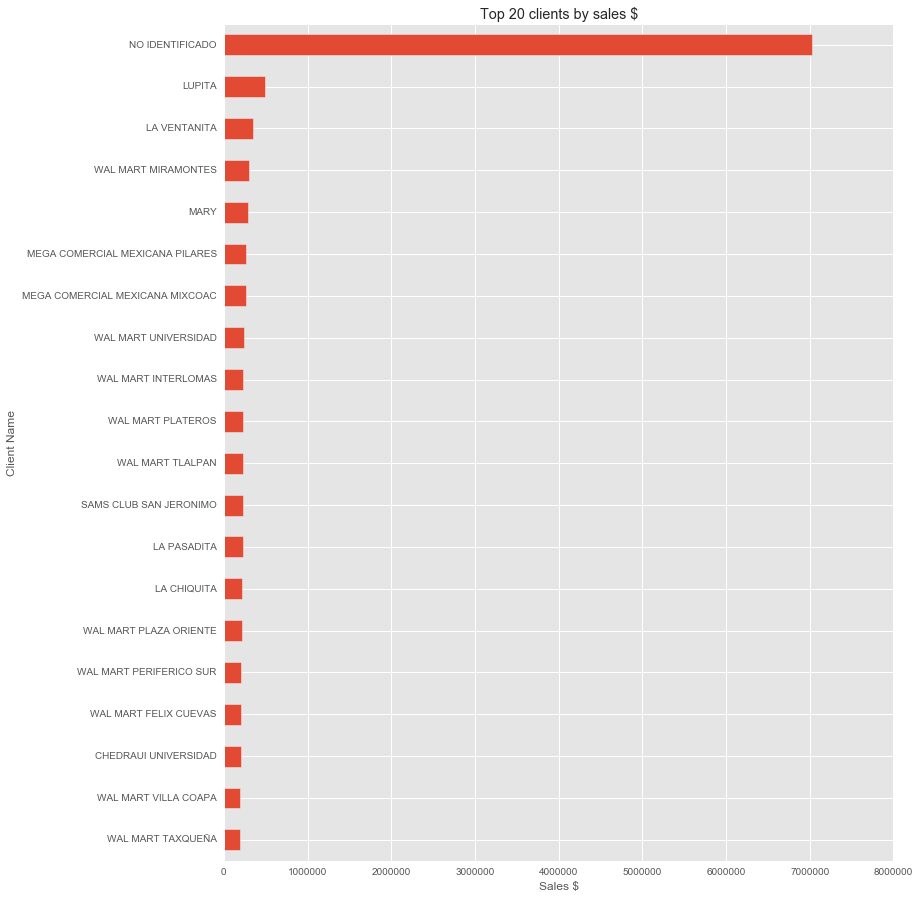

In [35]:
# What are the top 20 clients?
top_clients = (pd.merge(client_agg.reset_index(), client, on='Cliente_ID', how='left').
              groupby('NombreCliente')['Venta_hoy_sum'].sum().sort_values(ascending=False))
plt.figure(figsize=(12,15))
top_clients.head(20).sort_values().plot(kind='barh')
label_plot('Top 20 clients by sales $', 'Sales $', 'Client Name')
# A lot of clients are not identified (No Identificado)?

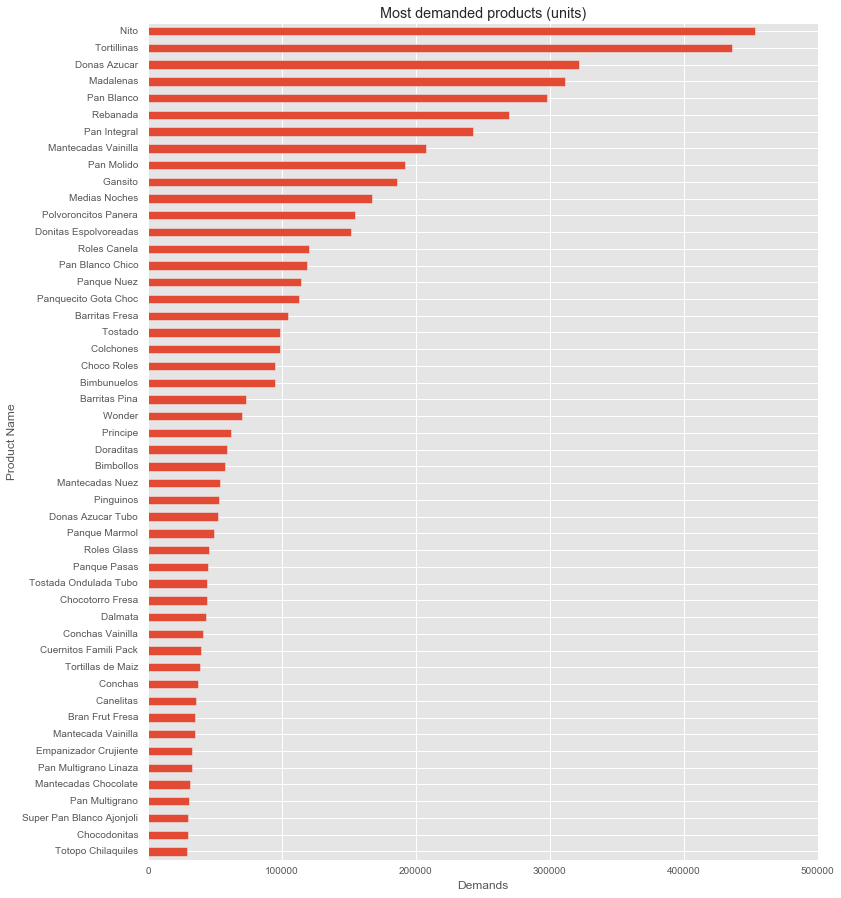

In [36]:
#What is the most demanded product?
most_demanded_product = (pd.merge(agg1.reset_index(), products, on='Producto_ID', how='left').
                         groupby('short_name')['Demanda_uni_equil_sum'].sum().sort_values(ascending=False))
plt.figure(figsize=(12,15))
most_demanded_product.head(50).sort_values().plot(kind='barh')
label_plot('Most demanded products (units)', 'Demands', 'Product Name')

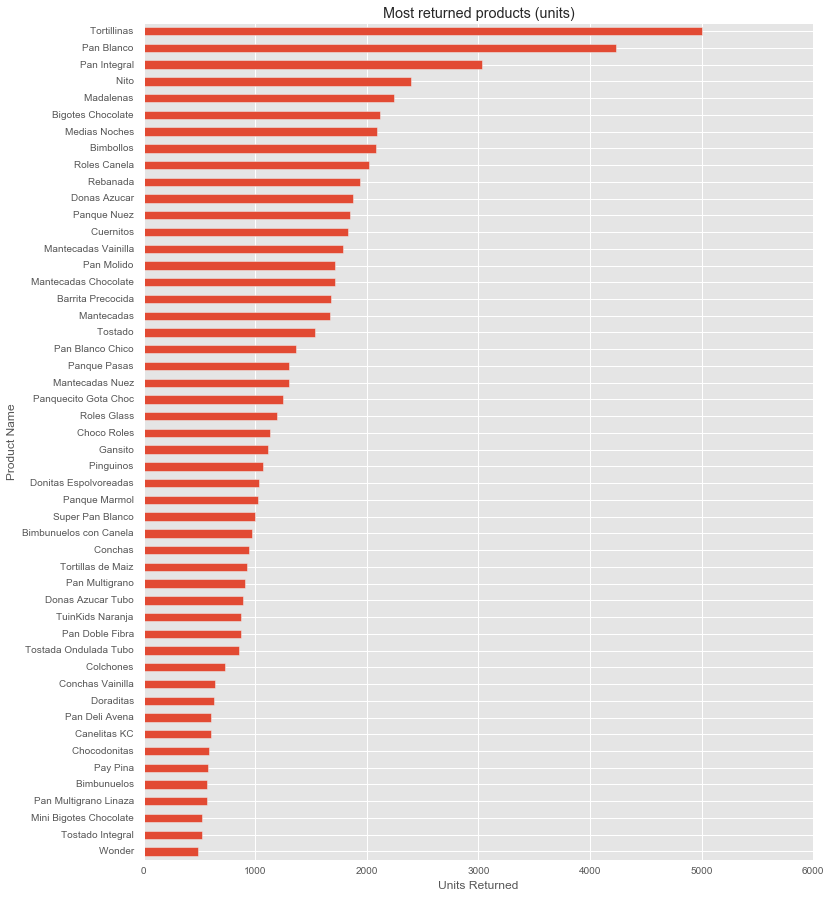

In [37]:
#What are the items that is being returned the most?
unwanted_product = (pd.merge(agg1.reset_index(), products, on='Producto_ID', how='left').
                         groupby('short_name')['Dev_uni_proxima_sum'].sum().sort_values(ascending=False))
plt.figure(figsize=(12,15))
unwanted_product.head(50).sort_values().plot(kind='barh')
label_plot('Most returned products (units)', 'Units Returned', 'Product Name')

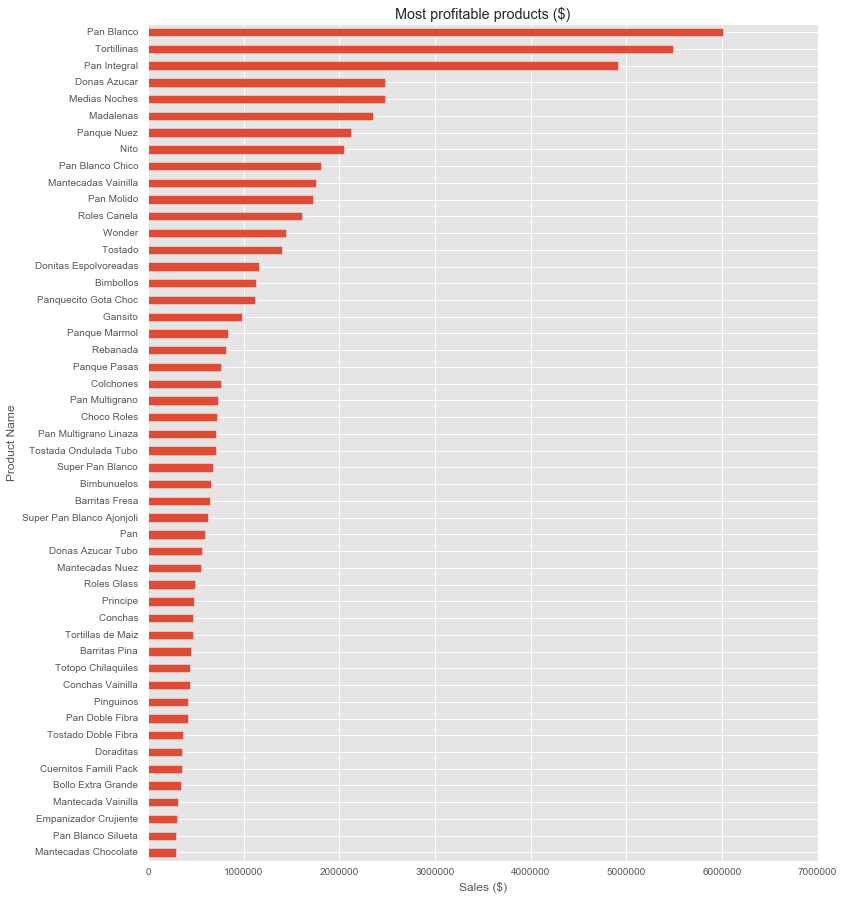

In [38]:
# What is the number 1 item in terms of sales?
product_sales = (pd.merge(agg.reset_index(), products, on='Producto_ID', how='left').
                         groupby('short_name')['Venta_hoy_sum'].sum().sort_values(ascending=False))
plt.figure(figsize=(12,15))
product_sales.head(50).sort_values().plot(kind='barh')
label_plot('Most profitable products ($)', 'Sales ($)', 'Product Name')

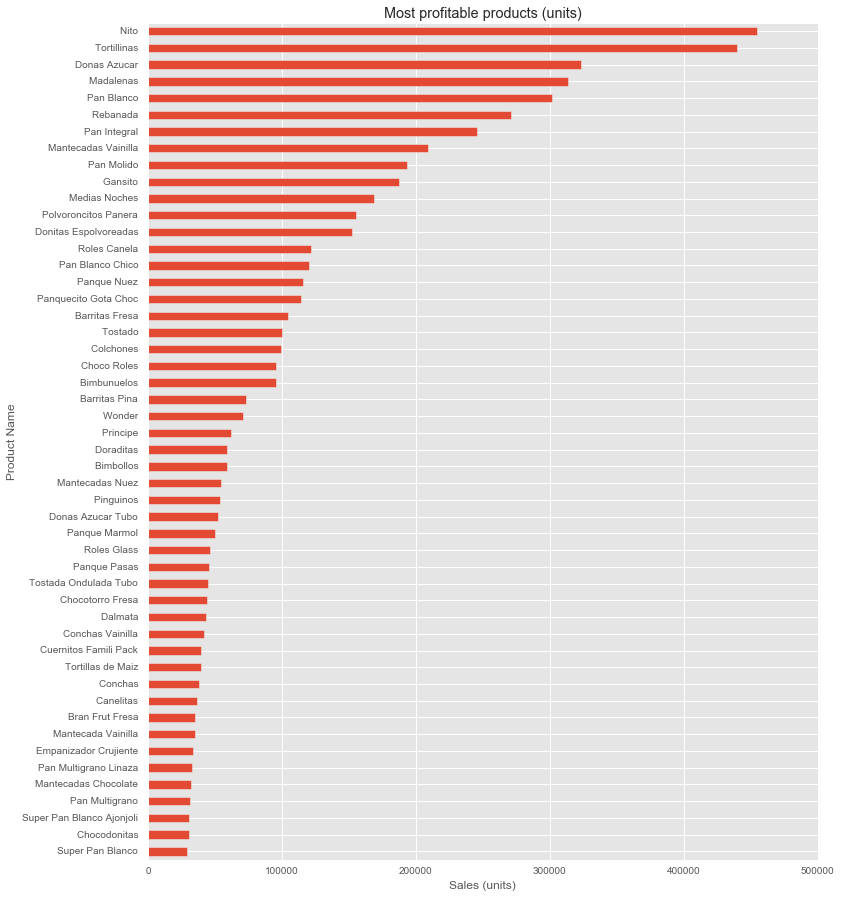

In [39]:
# What is the number 1 item in terms of sales unit?
most_profitable_product = (pd.merge(agg.reset_index(), products, on='Producto_ID', how='left').
                         groupby('short_name')['Venta_uni_hoy_sum'].sum().sort_values(ascending=False))
plt.figure(figsize=(12,15))
most_profitable_product.head(50).sort_values().plot(kind='barh')
label_plot('Most profitable products (units)', 'Sales (units)', 'Product Name')

In [40]:
# Aggregating all numerical numbers
number_aggregation = (pd.merge(agg.reset_index(), products, on='Producto_ID', how='left').
                     groupby('short_name')['Demanda_uni_equil_sum', 'Venta_uni_hoy_sum', 'Dev_uni_proxima_sum', 
                                          'Dev_uni_proxima_count']
                     .sum().sort_values(by= 'Demanda_uni_equil_sum', ascending=False))
number_aggregation

,Demanda_uni_equil_sum,Venta_uni_hoy_sum,Dev_uni_proxima_sum,Dev_uni_proxima_count
short_name,,,,
Nito,453037,455123,2393,34569
Tortillinas,436149,439776,5006,46870
Donas Azucar,321592,323005,1875,33860
Madalenas,311683,313540,2243,29367
Pan Blanco,297956,301677,4236,34844
Rebanada,269775,270935,1943,25816
Pan Integral,242707,245507,3030,46586
Mantecadas Vainilla,207715,209158,1783,31582
Pan Molido,192278,193372,1717,15750


In [41]:
number_aggregation.describe().T

,count,mean,std,min,25%,50%,75%,max
Demanda_uni_equil_sum,303.0,21718.445545,58594.666081,0.0,242.0,2618.0,11494.5,453037.0
Venta_uni_hoy_sum,303.0,21936.310231,59003.845034,0.0,242.0,2618.0,11729.5,455123.0
Dev_uni_proxima_sum,303.0,295.181518,617.623117,0.0,4.0,55.0,251.5,5006.0
Dev_uni_proxima_count,303.0,3300.330033,7650.942772,1.0,17.0,148.0,2676.0,46870.0


In [42]:
number_aggregation[number_aggregation.Demanda_uni_equil_sum == 0]
# There are products with 0 sales units(Venta_uni_hoy_sum) and only returns (Dev_uni_proxima/Units returned next week)

,Demanda_uni_equil_sum,Venta_uni_hoy_sum,Dev_uni_proxima_sum,Dev_uni_proxima_count
short_name,,,,
Deliciosas Chocolate,0,0,4,2
Principe mas Navigalleta,0,0,9,5
Raztachoc,0,0,8,4
Galleta Confeti,0,0,3,1
Duo Bran Fresa Pina,0,0,5,2
Bolsita Surtido Rico,0,0,2,2
Sponch Navidad,0,0,1,1
Bran Frut con Avena,0,0,25,2
Bran Frut Mango,0,0,4,2


In [43]:
number_aggregation[number_aggregation.Venta_uni_hoy_sum == 0]

,Demanda_uni_equil_sum,Venta_uni_hoy_sum,Dev_uni_proxima_sum,Dev_uni_proxima_count
short_name,,,,
Deliciosas Chocolate,0,0,4,2
Principe mas Navigalleta,0,0,9,5
Raztachoc,0,0,8,4
Galleta Confeti,0,0,3,1
Duo Bran Fresa Pina,0,0,5,2
Bolsita Surtido Rico,0,0,2,2
Sponch Navidad,0,0,1,1
Bran Frut con Avena,0,0,25,2
Bran Frut Mango,0,0,4,2


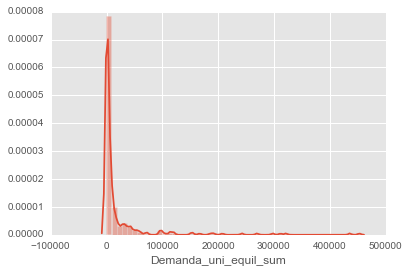

In [44]:
#Looking at the distribution of most demanded products
sns.distplot(most_demanded_product)

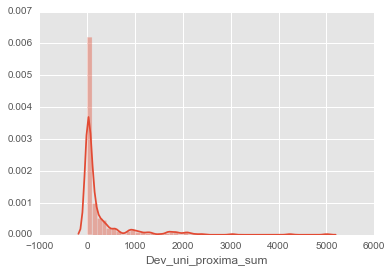

In [45]:
sns.distplot(number_aggregation.Dev_uni_proxima_sum)

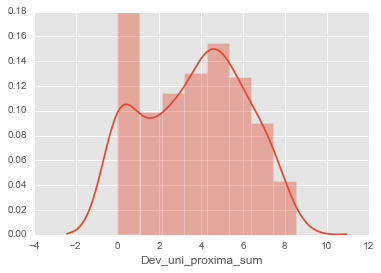

In [46]:
sns.distplot(np.log1p(number_aggregation.Dev_uni_proxima_sum))

In [47]:
import sklearn.linear_model
ransac = sklearn.linear_model.RANSACRegressor(max_trials=100)

In [48]:
#dataframe with the demand
demand = bimbo.loc[:,['Demanda_uni_equil']]
venta = bimbo.loc[:,['Venta_uni_hoy']]
#Using RANSAC regressor to find out how big is the correlation of Sales unit and demand
ransac.fit(venta, demand)

RANSACRegressor(base_estimator=None, is_data_valid=None, is_model_valid=None,
        max_trials=100, min_samples=None, random_state=None,
        residual_metric=None, residual_threshold=None, stop_n_inliers=inf,
        stop_probability=0.99, stop_score=inf)

In [49]:
#predicting the demand based on Sales unit
ransac_predictions = ransac.predict(demand)
ransac_predictions

array([[ 2.98144026],
       [ 3.98135339],
       [ 3.98135339],
       ..., 
       [ 1.98152714],
       [ 2.98144026],
       [ 5.98117965]])

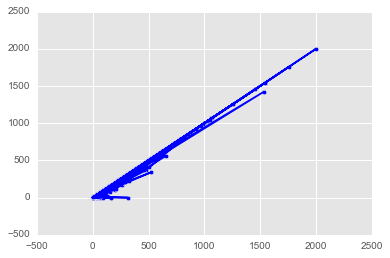

In [50]:
plt.scatter(venta, demand)
plt.plot(venta, ransac_predictions, color='blue')

In [51]:
ransac.estimator_

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [52]:
ransac.estimator_.coef_

array([[ 0.99991313]])

In [53]:
ransac.estimator_.intercept_

array([-0.01829912])

In [54]:
demand_with_features = bimbo.loc[:,['Venta_uni_hoy', 'Dev_uni_proxima']]

In [55]:
demand2 = bimbo.loc[:,['Demanda_uni_equil']]

In [56]:
ransac.fit(demand_with_features, demand2)

RANSACRegressor(base_estimator=None, is_data_valid=None, is_model_valid=None,
        max_trials=100, min_samples=None, random_state=None,
        residual_metric=None, residual_threshold=None, stop_n_inliers=inf,
        stop_probability=0.99, stop_score=inf)

In [58]:
predicted_demand = ransac.predict(demand_with_features)
predicted_demand

array([[ 2.98190849],
       [ 3.98204597],
       [ 3.98204597],
       ..., 
       [ 1.98177102],
       [ 2.98190849],
       [ 5.98232092]])

In [59]:
ransac.estimator_.coef_

array([[ 1.00013748, -0.01674927]])

In [60]:
ransac.estimator_.intercept_

array([-0.01850393])

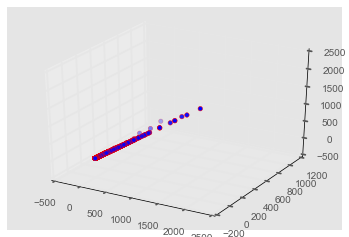

In [61]:
import mpl_toolkits.mplot3d
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(bimbo.Venta_uni_hoy, bimbo.Dev_uni_proxima, predicted_demand, color='red')